<a href="https://colab.research.google.com/github/saminehbagheri/Wine-Quality-Classifier/blob/master/wine_quality_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In the following cell you clone a github repository to have access to the wine dataset.

In [19]:
! git clone https://github.com/saminehbagheri/Wine-Quality-Classifier.git
%cd Wine-Quality-Classifier  
%ls

Cloning into 'Wine-Quality-Classifier'...
remote: Enumerating objects: 6, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 6 (delta 0), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (6/6), done.
/content/Wine-Quality-Classifier/Wine-Quality-Classifier
README.md  winequality-white.csv


Now we import all the necessary libraries which  are going to be needed in this notebook. 

In [0]:
from sklearn.model_selection import train_test_split #This  library is used for splitting our dataset into train and test datasets
import keras #Keras is used for the neural network model
from keras.models import Sequential
from keras.layers import Dense
from keras.utils.vis_utils import plot_model # This library gives us the possibility to visualize the used neural network model
from IPython.display import Image # This library assists us to show a plot_model in the notebook
#import pydot #graphics 
import numpy as np # We will work very often with numpy arrays and numpy mathemtical operations
from scipy import stats # This library can be used to get a fast statostical analysis of the data
import matplotlib.pyplot as plt


# Reading  &  Analysing the Data

Here we start with the white wine data. Maybe you can go through the similar procedure with the red wine data if you are interested.

In [21]:
#Reading the whole data in the whitewine numpy array
whitewine = np.loadtxt('winequality-white.csv', delimiter=';',skiprows=1)
print(whitewine.shape)


(4898, 12)


## Seperating the Input and Output Columns. 

In the wine quality dataset we have 4898 instances with 12 columns. The last column which is the quality column is the output column. The rest of columns are different features of each wine which are measurable.

In [22]:
#Seperating the input and output
myinput=np.delete(whitewine, -1, axis=1)
output=whitewine[:,-1]
print(stats.describe(output))
minOut=np.min(output)
maxOut=np.max(output)
print("The output has "+str(maxOut-minOut+1)+" classes from "+str(minOut)+" to "+str(maxOut))

DescribeResult(nobs=4898, minmax=(3.0, 9.0), mean=5.87790935075541, variance=0.7843556854710506, skewness=0.15574868141362455, kurtosis=0.21508011570192975)
The output has 7.0 classes from 3.0 to 9.0


## Normalizing The Input Array
It is important to normalize the input columns. The input features have very different nature and different ranges. If we do not normalize these values it can be that some features will be overrated if they are in higher ranges and features having values in smaller range might be underrated, although they might be as important as other features. In the following cell we use a simple mean normalization approach to bring all the input columns in more or less similar ranges.

In [23]:
#mean normalization
mu=np.average(myinput,axis=0) #calculating the mean of each column
sd=np.std(myinput,axis=0)     #calculting the standard deviation of each column
x=myinput-mu[None,:]          #subtracting the means from each column
x=np.divide(x,sd[None,:])
print(myinput)
print(x)


[[ 7.    0.27  0.36 ...  3.    0.45  8.8 ]
 [ 6.3   0.3   0.34 ...  3.3   0.49  9.5 ]
 [ 8.1   0.28  0.4  ...  3.26  0.44 10.1 ]
 ...
 [ 6.5   0.24  0.19 ...  2.99  0.46  9.4 ]
 [ 5.5   0.29  0.3  ...  3.34  0.38 12.8 ]
 [ 6.    0.21  0.38 ...  3.26  0.32 11.8 ]]
[[ 1.72096961e-01 -8.17699008e-02  2.13280202e-01 ... -1.24692128e+00
  -3.49184257e-01 -1.39315246e+00]
 [-6.57501128e-01  2.15895632e-01  4.80011213e-02 ...  7.40028640e-01
   1.34184656e-03 -8.24275678e-01]
 [ 1.47575110e+00  1.74519434e-02  5.43838363e-01 ...  4.75101984e-01
  -4.36815783e-01 -3.36667007e-01]
 ...
 [-4.20473102e-01 -3.79435433e-01 -1.19159198e+00 ... -1.31315295e+00
  -2.61552731e-01 -9.05543789e-01]
 [-1.60561323e+00  1.16673788e-01 -2.82557040e-01 ...  1.00495530e+00
  -9.62604939e-01  1.85757201e+00]
 [-1.01304317e+00 -6.77100966e-01  3.78559282e-01 ...  4.75101984e-01
  -1.48839409e+00  1.04489089e+00]]


## Modifying the Output Column

At the moment the output column ('quality' column) has values from 3 (low quality) to 9 (high quality) wine classes.  Basically we have 7 different classes all packed in one column. As we want to do a multi-class classification we need 7 output neurons for each possible class. Therefore, we should convert the last column to 7 columns. Running the following cell generates a 4898 x 7 dimensional array which can be used as the output array. 

In this notebook we address a multiclass classification. If you are interested you can try to build a binary classifier, predicting if a wine has bad quality (quality:3-5) or good quality (quality:4-9). How should we change the following cell to generate a proper output array for binary classification? How many output neurons are we going to need?



In [0]:
output=output-3
y=np.zeros([output.shape[0],7])
for i in range(output.shape[0]):
    if (output[i]==0):
        y[i,:]=[0,0,0,0,0,0,1]
    if (output[i]==1):
        y[i,:]=[0,0,0,0,0,1,0]
    if (output[i]==2):
        y[i,:]=[0,0,0,0,1,0,0]
    if (output[i]==3):
        y[i,:]=[0,0,0,1,0,0,0]
    if (output[i]==4):
        y[i,:]=[0,0,1,0,0,0,0]    
    if (output[i]==5):
        y[i,:]=[0,1,0,0,0,0,0]
    if (output[i]==6):
        y[i,:]=[1,0,0,0,0,0,0]

# Splitting Training and Test Datasets

In order to be able to asses the quality of our NN model, it is important to evaluate the model on a set of unseen data which were not used during the training procedure. In the next cell we use a sklearn splitting function to seperate training and test datasets. It is very common to use 10 to 20 percent of the data for test and the rest for the training. As we have a relatively small dataset we use 90 percent of the data for training and the remaining 10 percent for testing.

In [25]:
xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size = 0.1, random_state = 0)
print(xTrain.shape)
print(yTrain.shape)
print(xTest.shape)
print(yTest.shape)


(4408, 11)
(4408, 7)
(490, 11)
(490, 7)


# Defining and Visualising Our Neural Network with Keras

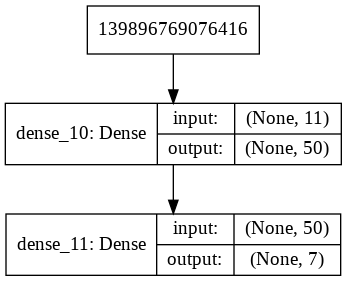

In [46]:
model = Sequential()
l0=11
l1=50
#2=50
#l3=50
lf=7
model.add(Dense(units=l1, activation='relu', input_dim=l0))
#odel.add(Dense(units=l2, activation='relu', input_dim=l1))
#model.add(Dense(units=l3, activation='relu', input_dim=l2))
model.add(Dense(units=lf, activation='softmax'))
modelplot=plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)
Image(retina=True, filename='model_plot.png')


# Compiling and Training the Model

Train on 3918 samples, validate on 980 samples
Epoch 1/150
3918/3918 [==============================] - 1s 378us/step - loss: 1.2435 - val_loss: 1.1182
Epoch 2/150
3918/3918 [==============================] - 1s 169us/step - loss: 1.1183 - val_loss: 1.0266
Epoch 3/150
3918/3918 [==============================] - 1s 168us/step - loss: 1.0983 - val_loss: 0.9930
Epoch 4/150
3918/3918 [==============================] - 1s 176us/step - loss: 1.0811 - val_loss: 1.0269
Epoch 5/150
3918/3918 [==============================] - 0s 126us/step - loss: 1.0710 - val_loss: 1.0082
Epoch 6/150
3918/3918 [==============================] - 0s 124us/step - loss: 1.0628 - val_loss: 0.9590
Epoch 7/150
3918/3918 [==============================] - 0s 123us/step - loss: 1.0554 - val_loss: 0.9997
Epoch 8/150
3918/3918 [==============================] - 0s 122us/step - loss: 1.0448 - val_loss: 0.9848
Epoch 9/150
3918/3918 [==============================] - 0s 122us/step - loss: 1.0408 - val_loss: 0.9600
Epoch 10

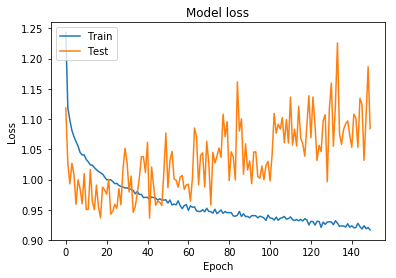

In [47]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.SGD(lr=0.05, momentum=0.0, nesterov=True))

#model.fit(xTrain, yTrain, epochs=200, batch_size=10)

history = model.fit(x, y, validation_split=0.2, epochs=150, batch_size=10, verbose=1)
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

We can see that the training error is gradually decreasing, similar to the test error in the first iterations but at some point around 50 Epoches, we can see that test error starts to increase. Maybe you can try to answer the following questions:
* How do you explain this behavior? 
* How do you evaluate the generated model?
* Do you think that our model is generic and reliable or is it overfitted? 
* How can we improve our model?

# Testing the Model on the Test Dataset

In [30]:
loss_and_metrics = model.evaluate(xTest, yTest, batch_size=128)
print(loss_and_metrics)
#classes = model.predict(xTest, batch_size=128)
#print(classes[140,:])
#print(yTest[140,:])


490/490 [==============================] - 0s 15us/step
3.063570042045749
